In [4]:
from sklearn.datasets import load_breast_cancer
import numpy
import  matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# Load breast cancer datasets
data = load_breast_cancer()
X = data.data # features
y = data.target # labels

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data as train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [6]:
from sklearn.linear_model import LogisticRegression

# Create Model
model = LogisticRegression()

# Train Model
model.fit(X_train,y_train)

LogisticRegression()

In [7]:
# Calculate Accuracy of the Model

from sklearn.metrics import accuracy_score,classification_report

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
print(f"Model Accuracy Rate:{accuracy:.2f}")

print(classification_report(y_test,y_pred))

Model Accuracy Rate:0.99
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        64
           1       0.99      0.99      0.99       107

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



In [9]:
X = pd.DataFrame(X)

In [10]:
X_train_df = pd.DataFrame(X_train,columns=[f'feature_{i}' for i in range(X_train.shape[1])])
print(list(X_train_df.columns))

['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29']


In [11]:
# Save the Model to use later then predict on new datas
import joblib
import numpy as np
# Save the model

joblib.dump(model,"logistic_regression_model.pkl")
joblib.dump(scaler,"scaler.pkl")

loaded_model = joblib.load("logistic_regression_model.pkl")
new_data = [15.5, 20.0, 100, 500, 0.1, 0.2, 0.8, 0.4, 0.2, 0.1,15.5, 20.0, 100, 500, 0.1, 0.2, 0.1, 0.4, 0.2, 0.1,15.5, 20.0, 82, 500, 0.1, 0.2, 0.9, 0.4, 0.2, 0.1] # Example Data
new_data = np.array(new_data).reshape(1,-1)
print("Column number of dataset:",X_train.shape[1])
print("Column number of new dataset:",len(new_data))
new_data = scaler.transform(new_data) # First Scale
prediction = loaded_model.predict(new_data)


print("Prediction Result:","malignant" if prediction[0]==1 else "good-naturent")



Column number of dataset: 30
Column number of new dataset: 1
Prediction Result: good-naturent


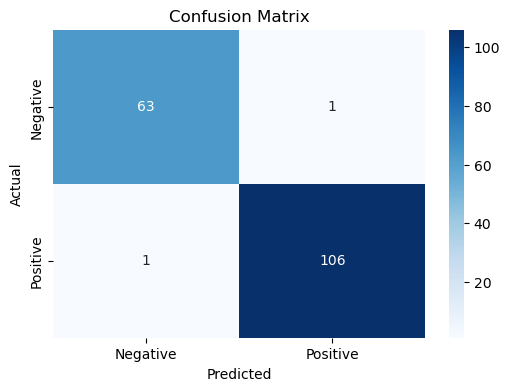

In [14]:
from sklearn.metrics import confusion_matrix as cm, classification_report as cr
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

# Modeli yükleme
model = joblib.load("logistic_regression_model.pkl")

y_pred = model.predict(X_test)

cm = cm(y_test,y_pred)

# Visualization
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues",xticklabels=["Negative","Positive"],yticklabels=["Negative","Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()